# Time series I
Cenying (Tracy) Yang (cenying.yang@cityu.edu.hk)

Department of Information Systems

City University of Hong Kong

#### Statsmodels is a library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

Statsmodels是一个库，它提供了用于估计许多不同的统计模型以及进行统计测试和统计数据探索的类和函数。

该库包含以下主要模块：

regression（回归分析）：包括线性回归、岭回归、LASSO回归等模型。

time series analysis（时间序列分析）：包括ARIMA模型、VAR模型、VARMA模型等模型。

hypothesis tests（假设检验）：包括t检验、F检验、卡方检验等检验方法。

ANOVA（方差分析）：包括单因素方差分析、双因素方差分析等分析方法。

density estimation（密度估计）：包括核密度估计、正态分布拟合等方法。

statsmodels可以帮助用户在Python中完成统计分析和建模的工作，例如：
利用线性回归模型对数据进行拟合和预测。
对时间序列数据进行分析和预测。
进行假设检验，如检验两组数据的均值是否有差异。
分析方差，如判断不同因素对数据变化的影响。
估计数据的概率分布，如密度估计和正态分布拟合。

ETSModel是Statsmodels库中的一个类，用于拟合和预测时间序列数据的Exponential Smoothing（指数平滑）模型。ETSModel可用于多种时间序列模型，包括简单指数平滑、Holt线性趋势模型和Holt-Winters季节性模型等。该类提供了多种参数配置，可以根据数据的特征和需求选择最合适的模型。在ETSModel中，可以通过fit()方法进行模型的拟合，通过forecast()方法进行预测。


#### Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.

Matplotlib是一个用于创建静态，动画和交互式可视化的综合库。

In [1]:
import pandas as pd                   # pandas：用于数据处理和数据结构创建；
import numpy as np                    # numpy：用于科学计算
from sklearn import metrics           # sklearn.metrics：用于度量预测结果的性能    
from statsmodels.tsa.exponential_smoothing.ets import ETSModel   # 用于指数平滑时间序列模型；
from matplotlib import pyplot as plt  # matplotlib.pyplot：用于可视化数据；
# a magic function that renders the figure in a notebook  在笔记本中呈现图形的魔术函数
%matplotlib inline                    

## 1. Shampoo sales

In [2]:
# read csv file
shampoo = pd.read_csv('shampoo_sales.csv')
print(shampoo.head())

       Date  Sales
0  1/1/2020  266.0
1  2/1/2020  145.9
2  3/1/2020  183.1
3  4/1/2020  119.3
4  5/1/2020  180.3


Text(0.5, 1.0, 'Daily shampoo sales')

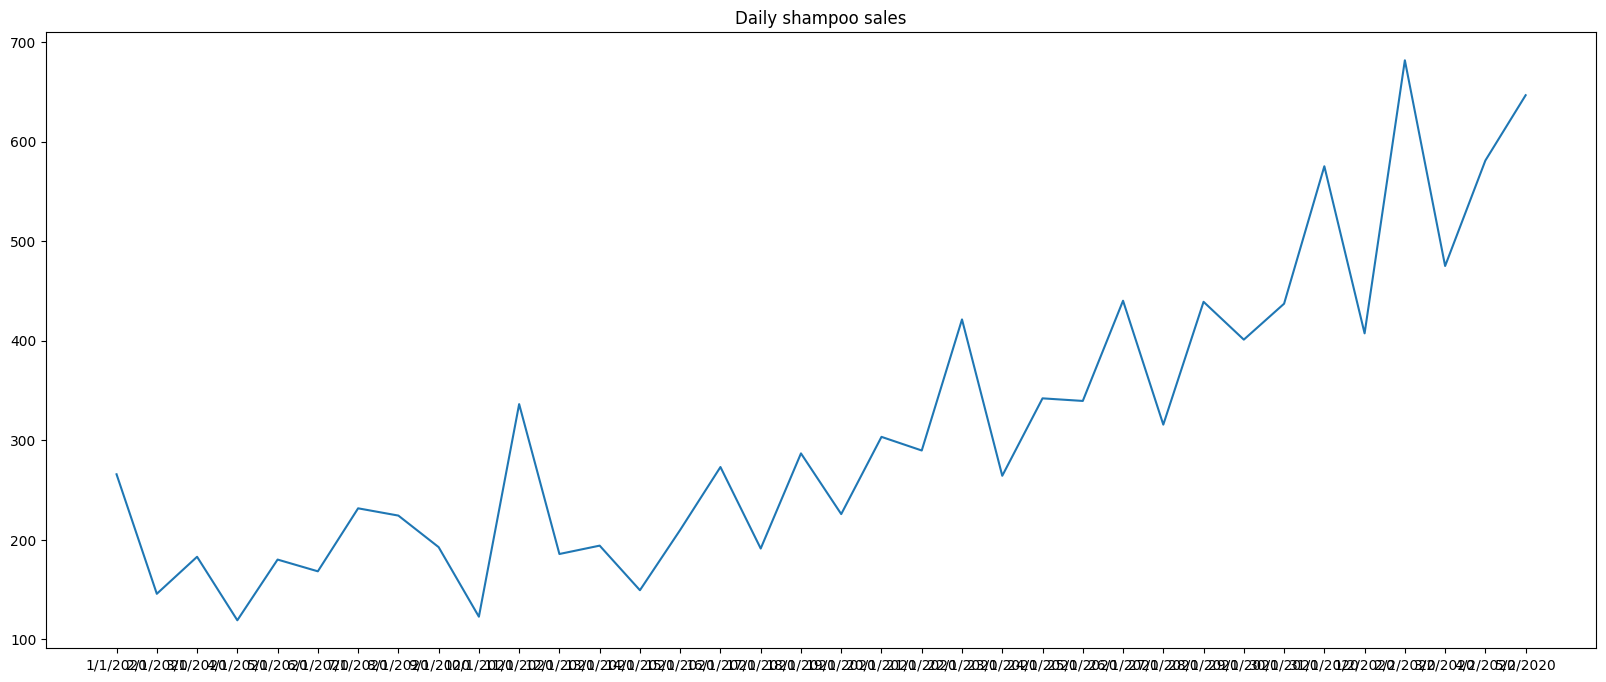

In [3]:
# plot the time series data
plt.figure(figsize = (20,8))
plt.plot(shampoo['Date'], shampoo['Sales'])
plt.title('Daily shampoo sales')

这段代码创建了一个关于“shampoo”数据框中每日洗发水销售额数据的折线图。图表的尺寸为20英寸宽、8英寸高，横轴表示日期（来自“Date”列），纵轴表示销售额（来自“Sales”列）。图表的标题为“Daily shampoo sales”（每日洗发水销售额）。

### Do you observe any trend or seasonality? 

#### There is a clear upward trend but no seasonality. So Holt linear model (exponential smoothing + trend) may be appropriate. But let's try different models anyway. 

In [4]:
# first split our data into training and test
train = shampoo[:-5]
test = shampoo[-5:]
train.shape, test.shape

((31, 2), (5, 2))

这段代码将“shampoo”数据框中的数据分为训练集和测试集。其中，训练集包含数据框的前面部分，测试集包含数据框的后面部分。训练集的大小为整个数据框减去最后5行，而测试集的大小为最后5行。

代码中的第一行将“shampoo”数据框的前面部分（除了最后5行）赋值给变量“train”；

第二行将“shampoo”数据框的最后5行赋值给变量“test”。

第三行代码输出了训练集和测试集的大小，以元组形式显示，其中第一个元素表示行数，第二个元素表示列数。

Text(0.5, 1.0, 'Daily shampoo sales')

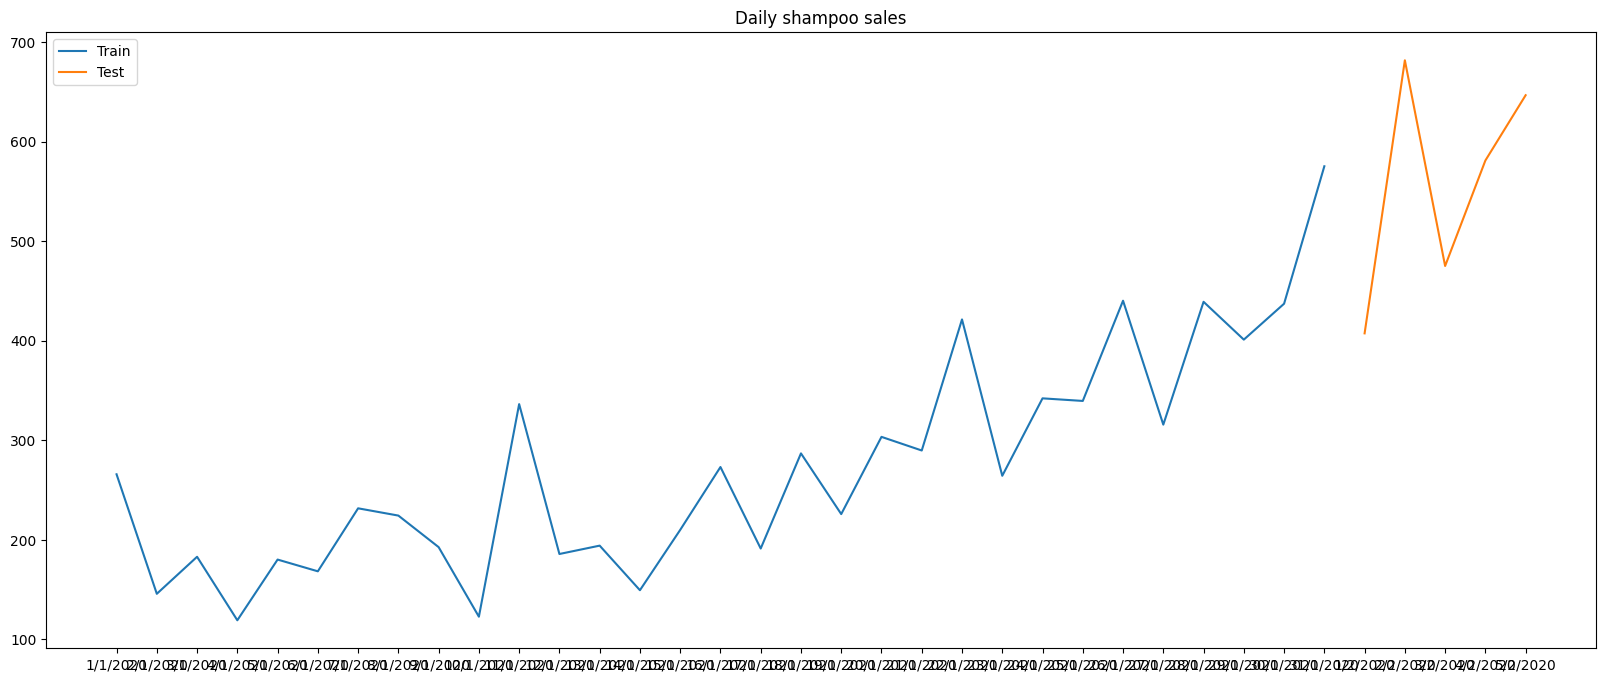

In [5]:
# plot training and testing data
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.legend(loc = 'upper left')
plt.title('Daily shampoo sales')

这段代码创建了一个关于“shampoo”数据框中训练集和测试集每日洗发水销售额数据的折线图。图表的尺寸为20英寸宽、8英寸高，其中训练集的数据用蓝色的折线表示，测试集的数据用橙色的折线表示。图例显示在左上角，标题为“Daily shampoo sales”（每日洗发水销售额）。

第一行代码创建了一个20英寸宽、8英寸高的图表。

第二行代码绘制了训练集数据的折线，横轴表示日期（来自“Date”列），纵轴表示销售额（来自“Sales”列），使用'label'参数给该折线图命名为“Train”。

第三行代码绘制了测试集数据的折线，横轴表示日期，纵轴表示销售额，使用'label'参数给该折线图命名为“Test”。

第四行代码使用plt.legend()函数添加一个图例，用于标识训练集和测试集折线图的含义，其中'loc'参数指定图例的位置，'upper left'表示将图例放在左上角。

第五行代码设置了图表的标题。

### 1.1 Simple moving average

这段代码基于训练集的销售额数据，使用滑动平均法计算测试集的销售额预测值，并将预测结果添加到测试集数据框中。然后，代码创建一个关于训练集、测试集和滑动平均法预测结果的折线图。图表的尺寸为20英寸宽、8英寸高。

第一行代码计算训练集(train)最后5天的平均销售额(moving average)，然后将该值分配给测试集(test)中名为'moving_average_forecast5'的新列。

使用rolling函数对训练集中的“Sales”列进行滑动平均计算。rolling(5)方法表示使用滑动窗口大小为5，，采用5个观测值作为窗口大小，在本例中表示每5天计算一个平均值。

mean()方法计算每个窗口中所有值的平均值，最后iloc[-1]获取计算结果的最后一个值，即最近的平均值，然后将该值添加到测试集的数据框中，命名为“moving_average_forecast5”。

这行代码实现了使用移动平均方法进行预测的简单模型。

第二行到第五行的代码与前面的代码相同，绘制了训练集和测试集的销售额数据的折线图，并添加了相应的标签和图例。

第三行代码绘制了滑动平均法预测结果的折线图，横轴为测试集的日期，纵轴为预测的销售额值，并将其用“Moving Average Forecast with 5 Observations”标签标识。

最后一行代码用plt.show()命令显示图表。

<ipython-input-6-f4d9851fd36c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_average_forecast5'] = train['Sales'].rolling(5).mean().iloc[-1] # get the last value of the moving average


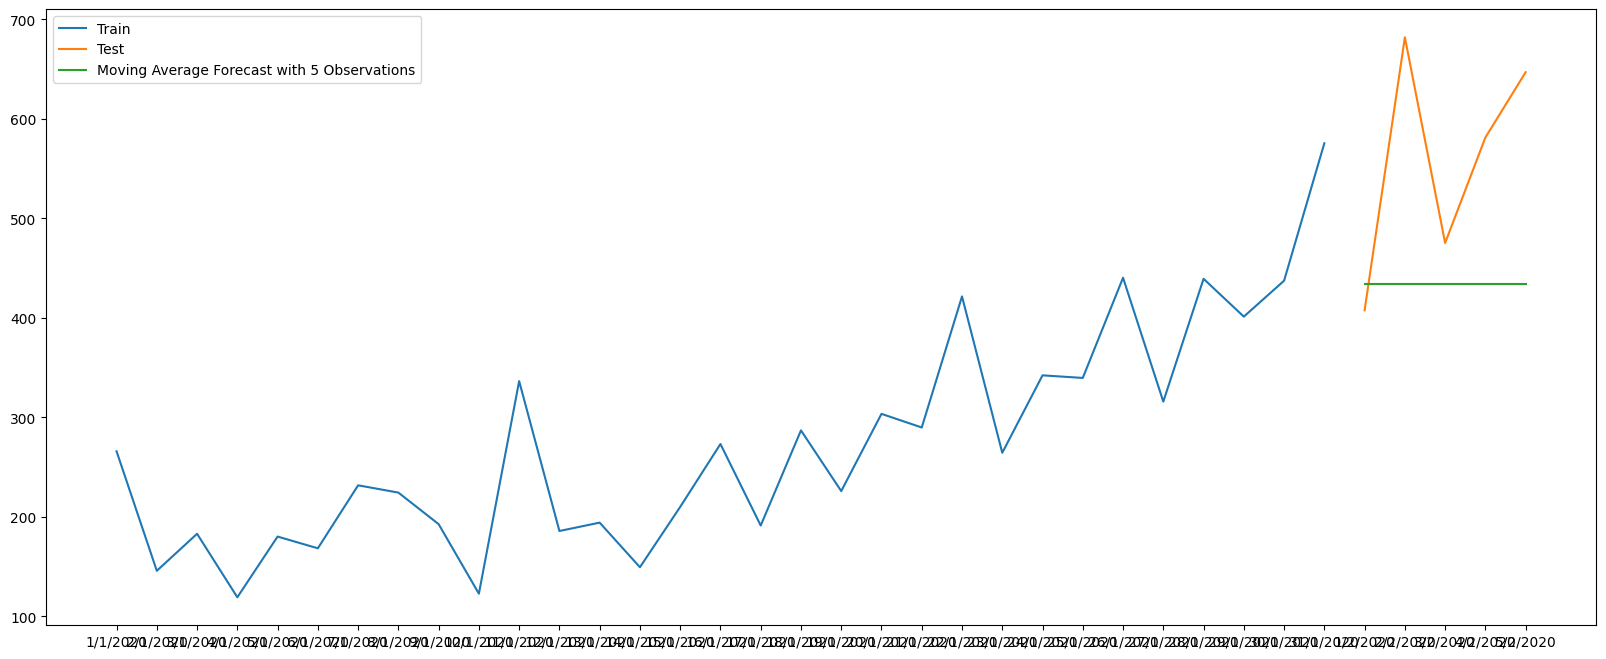

In [6]:
# moving average with 5, 10, and 15 windows
test['moving_average_forecast5'] = train['Sales'].rolling(5).mean().iloc[-1] # get the last value of the moving average
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], test['moving_average_forecast5'], label = 'Moving Average Forecast with 5 Observations')
plt.legend(loc = 'upper left')   # 将图例放在左上角
plt.show()

在时间序列数据分析中，我们经常需要使用移动平均方法来平滑数据并发现趋势。用于平滑数据、去除噪声、发现趋势和季节性变化。移动平均的基本思想是：用一定时间内的数据的平均值来代表这段时间内的整体趋势。

在移动平均方法中，首先需要选择一个固定的时间窗口，例如5天或30天。然后，将该时间窗口内的数据取平均值，得到一个预测值。随着时间的推移，窗口向前滑动，计算下一个预测值，如此往复。每次预测都是使用固定的时间窗口内的数据的平均值来代表该时间段的趋势。

移动平均方法可以平滑数据，去除噪声，发现趋势和季节性变化。移动平均方法有简单移动平均、加权移动平均、指数加权移动平均等不同形式，根据不同的数据特点和需求，可以选择不同的移动平均方法

rolling方法就是为了方便地计算移动平均而存在的。

rolling是一个pandas中的方法，用于创建一个滑动窗口对象，该对象可以在时间序列数据上进行滑动窗口计算。rolling()方法可以用于计算移动平均、移动标准差、移动相关系数等。

例如，rolling(5)表示在时间序列数据中，创建一个窗口大小为5的滑动窗口对象，可以在该对象上进行计算，以获得每5个数据点的平均值、标准差、相关系数等。

rolling()方法通常与其他pandas方法，例如mean()、std()、cov()等一起使用。

<ipython-input-7-1af105c7d9aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_average_forecast10'] = train['Sales'].rolling(10).mean().iloc[-1]


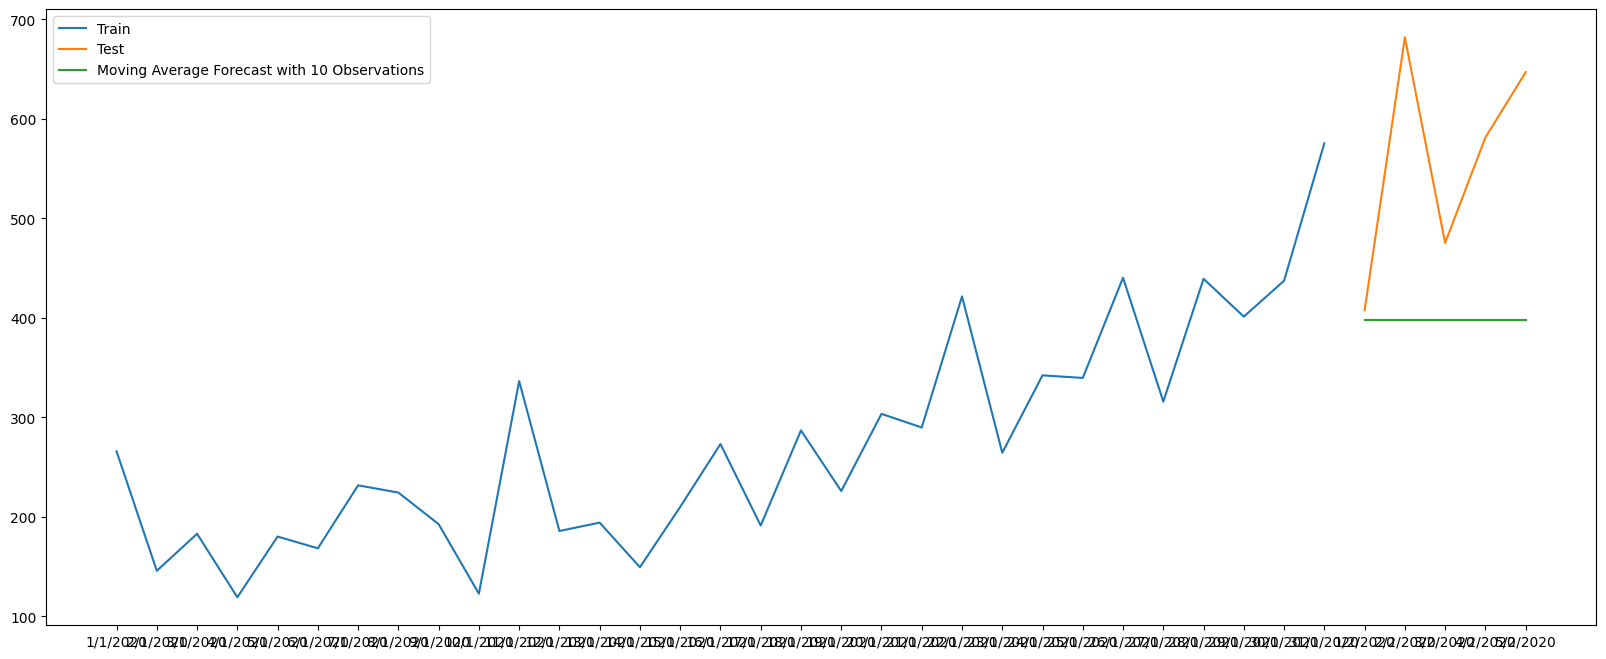

<ipython-input-7-1af105c7d9aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_average_forecast15'] = train['Sales'].rolling(15).mean().iloc[-1]


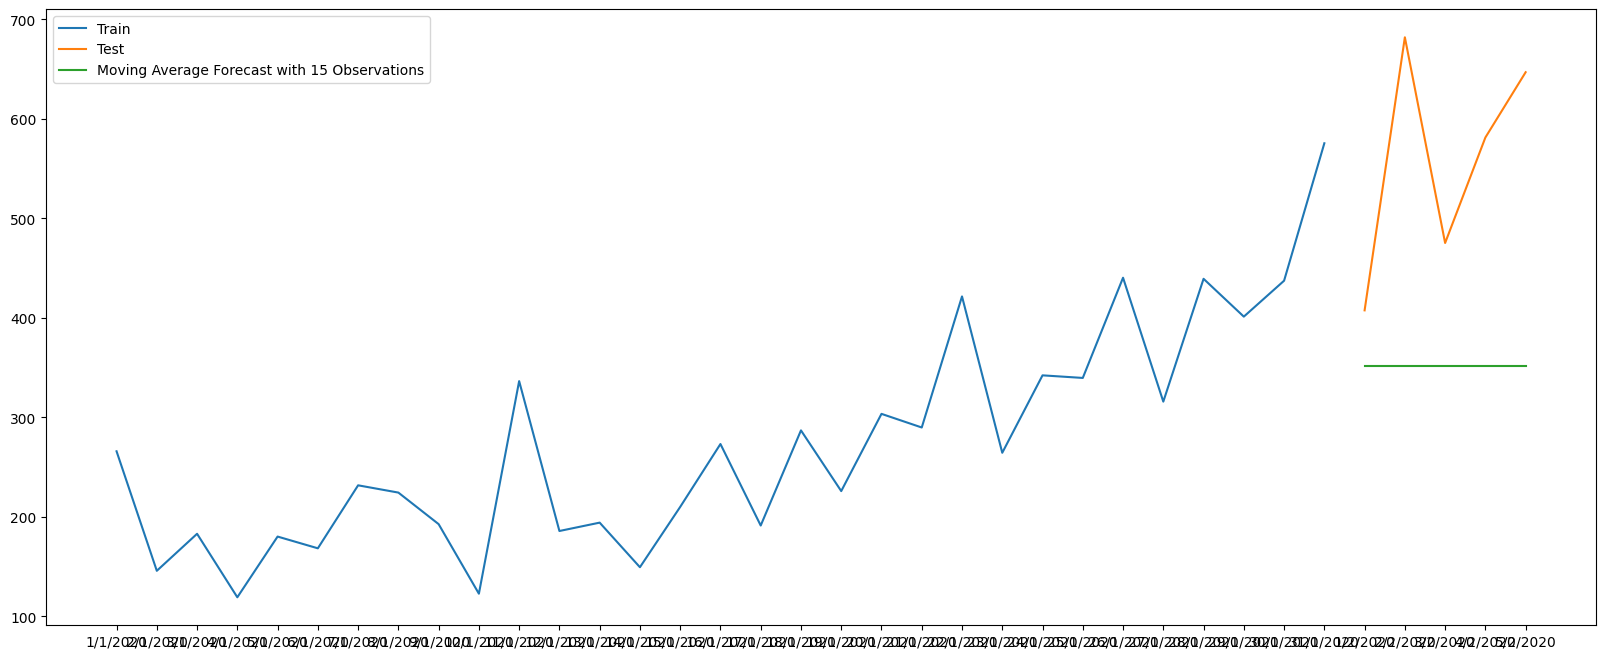

In [7]:
test['moving_average_forecast10'] = train['Sales'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], test['moving_average_forecast10'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'upper left')
plt.show()
test['moving_average_forecast15'] = train['Sales'].rolling(15).mean().iloc[-1]
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], test['moving_average_forecast15'], label = 'Moving Average Forecast with 15 Observations')
plt.legend(loc = 'upper left')
plt.show()

在移动平均方法中，选择不同的rolling值会对平滑后的结果产生影响。

较小的rolling值会产生更敏感的平滑结果，反映出数据中的更短期的波动和趋势，但也会更加噪声敏感，导致平滑后的结果波动更大。

较大的rolling值会产生更平滑的结果，反映出更长期的趋势和波动，但也可能忽略了数据中的一些短期趋势和波动。

因此，选择rolling值需要考虑数据的特点和分析的需求，需要根据实际情况进行选择，以达到较好的平滑效果和分析结果。一般来说，需要在多个rolling值中进行比较，选取最合适的rolling值。

In [8]:
# get rmse of moving average with 5, 10, and 15 windows on test data
rmse_sma5 = metrics.mean_squared_error(y_pred=test['moving_average_forecast5'],
                                       y_true=test['Sales'], squared = False)
rmse_sma10 = metrics.mean_squared_error(y_pred=test['moving_average_forecast10'],
                                       y_true=test['Sales'], squared = False)
rmse_sma15 = metrics.mean_squared_error(y_pred=test['moving_average_forecast15'],
                                       y_true=test['Sales'], squared = False)
print(rmse_sma5)
print(rmse_sma10)
print(rmse_sma15)

161.91353618521214
191.1078609058246
231.22183201419364


这段代码计算了不同rolling值下的移动平均预测值与测试数据集中实际销售值的均方根误差（RMSE）。RMSE是评估预测结果与实际观测值之间差异的一种常见指标，其计算公式为预测值与实际值之差的平方和的平均值再开根号。

具体而言，代码中首先调用了mean_squared_error函数从sklearn.metrics模块中计算了三个RMSE值，

rmse_sma5/10/15：使用rolling=5/10/15的移动平均方法对测试数据进行预测的RMSE值。

这些RMSE值可以用于比较不同rolling值下的预测结果的准确性，以便选择最优的rolling值。其中，RMSE值越小，表示预测结果越接近实际值，预测效果越好。

squared = False是为了计算RMSE（均方根误差）而设置的。默认情况下，mean_squared_error函数计算的是MSE（均方误差），即误差的平方的平均值。如果将squared参数设置为True，则返回MSE的值。而将其设置为False则会返回RMSE的值，即MSE的平方根。

### 1.2 Simple exponential smoothing

第一段代码创建了一个时间序列预测模型，基于训练数据集train中的销售数据。

具体地，第一行代码创建了一个ETSModel对象，表示该模型是由statsmodels包提供的基于指数平滑的时间序列模型。

第二行代码使用训练数据对模型进行拟合，并将结果存储在ses_fit对象中。

第三行代码利用ses_fit对象生成了接下来5个时间点的预测结果，并将其存储在y_predict对象中。
在forecast()方法中，生成的时间点是相对于训练数据集中最后一个时间点的。通常情况下，ETS模型生成的时间点是均匀间隔的，例如在每个单位时间内（如每个月、每个季度等）生成预测结果。因此，您可以检查测试数据集的第一个时间点，确定模型是从哪个时间点开始生成预测结果的，并根据预测时间步长来确定预测结果所代表的时间点。

In [9]:
ses = ETSModel(train['Sales'])
ses_fit = ses.fit()
y_predict = ses_fit.forecast(5)

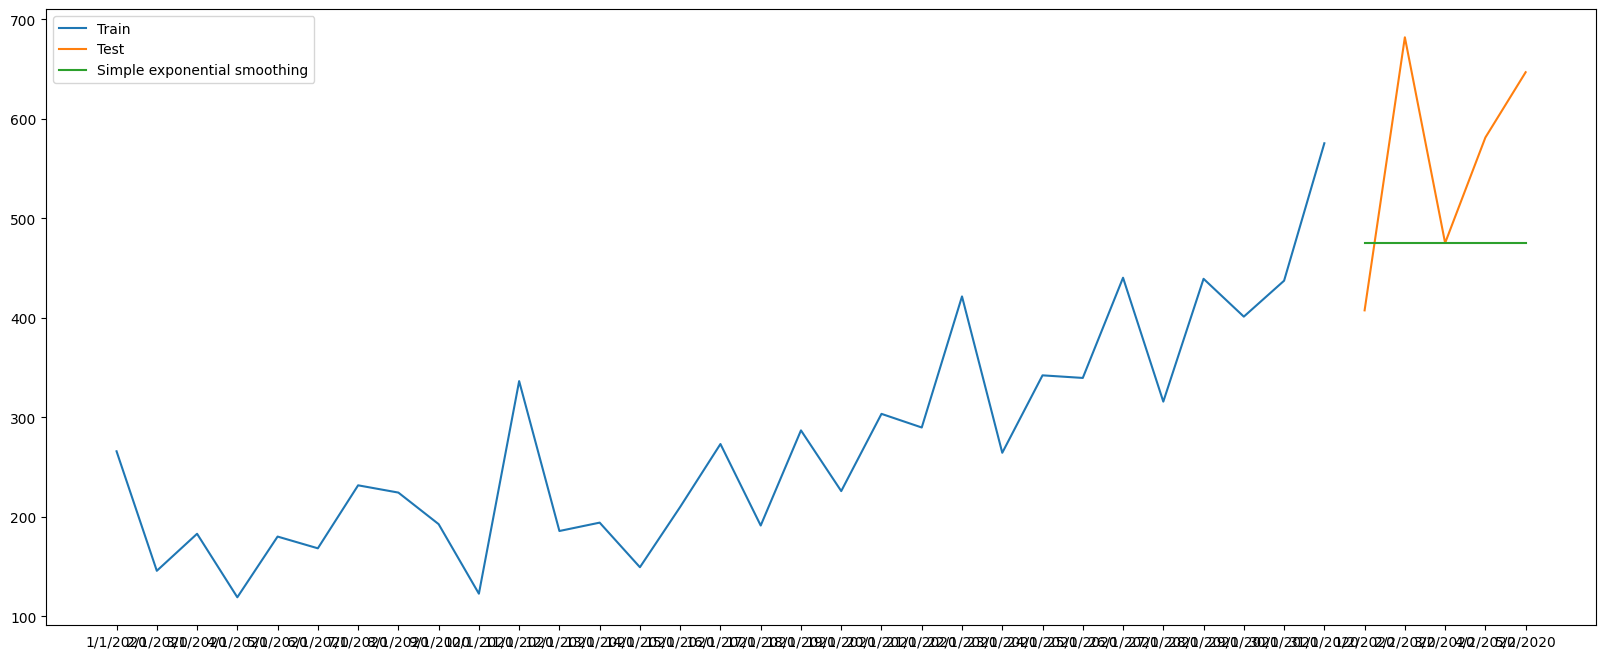

In [10]:
plt.figure(figsize = (20,8)) #这行代码创建了一个图形窗口，并设置了它的大小为20*8英寸。这个窗口可以容纳图表。

# 将训练数据集中的日期和销售值作为 x 和 y 坐标，并用实线将它们连接起来，用于显示训练数据集中的销售情况。
# label='Train' 表示给这个数据集加上一个标签名为 "Train"。
plt.plot(train['Date'], train['Sales'], label = 'Train')

# 将测试数据集中的日期和销售值作为 x 和 y 坐标，并用虚线将它们连接起来，用于显示测试数据集中的销售情况。
# label='Test' 表示给这个数据集加上一个标签名为 "Test"。
plt.plot(test['Date'], test['Sales'], label = 'Test')

# 将预测结果y_predict的日期和值作为 x 和 y 坐标，并用点线将它们连接起来，用于显示预测结果。
# label='Simple exponential smoothing' 表示给这个预测结果加上一个标签名为 "Simple exponential smoothing"。
plt.plot(test['Date'], y_predict, label = 'Simple exponential smoothing')

# 添加一个图例，它显示了每个数据集和预测结果的标签，loc='upper left' 表示图例放置在左上角。
plt.legend(loc = 'upper left')

plt.show() #在图形窗口中显示了绘制的图表。这个函数会阻塞主线程直到窗口关闭。

下段代码计算了SES模型在测试集上的均方根误差（RMSE）。RMSE是衡量模型预测精度的常用指标，它衡量了模型的预测值与真实值之间的差异，计算公式为均方根误差=√(∑(y_pred-y_true)^2/n)。其中，y_pred是模型预测值，y_true是真实值，n是样本数量。

具体来说，代码中metrics.mean_squared_error()函数计算了预测值y_predict与测试集中实际销售额test['Sales']的均方根误差，并将结果赋值给变量rmse_ses。这里squared参数设为False，表示计算的是均方根误差，而非均方误差。

最后，print()函数输出了SES模型在测试集上的均方根误差。该值越小，表示模型的预测精度越高。

In [11]:
rmse_ses = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=test['Sales'], squared = False)
print(rmse_ses)

132.54547762662133


### 1.3 Holt Linear

下段代码定义了一个Holt线性趋势模型，其中train['Sales']是模型的训练数据。模型中设置了trend='add'参数，表示模型考虑到了线性趋势的影响。

接下来，使用fit()方法对模型进行拟合，拟合结果保存在变量holt_fit中。

然后，使用forecast()方法对拟合好的模型进行预测，并得到5个时间点的预测结果，保存在变量y_predict中。

与前面的SES模型类似，这里也是生成了5个时间点的预测结果，因为在这个例子中需要对未来5个时间点的销售额进行预测。

In [12]:
holt = ETSModel(train['Sales'], trend='add')
holt_fit = holt.fit()
y_predict = holt_fit.forecast(5)

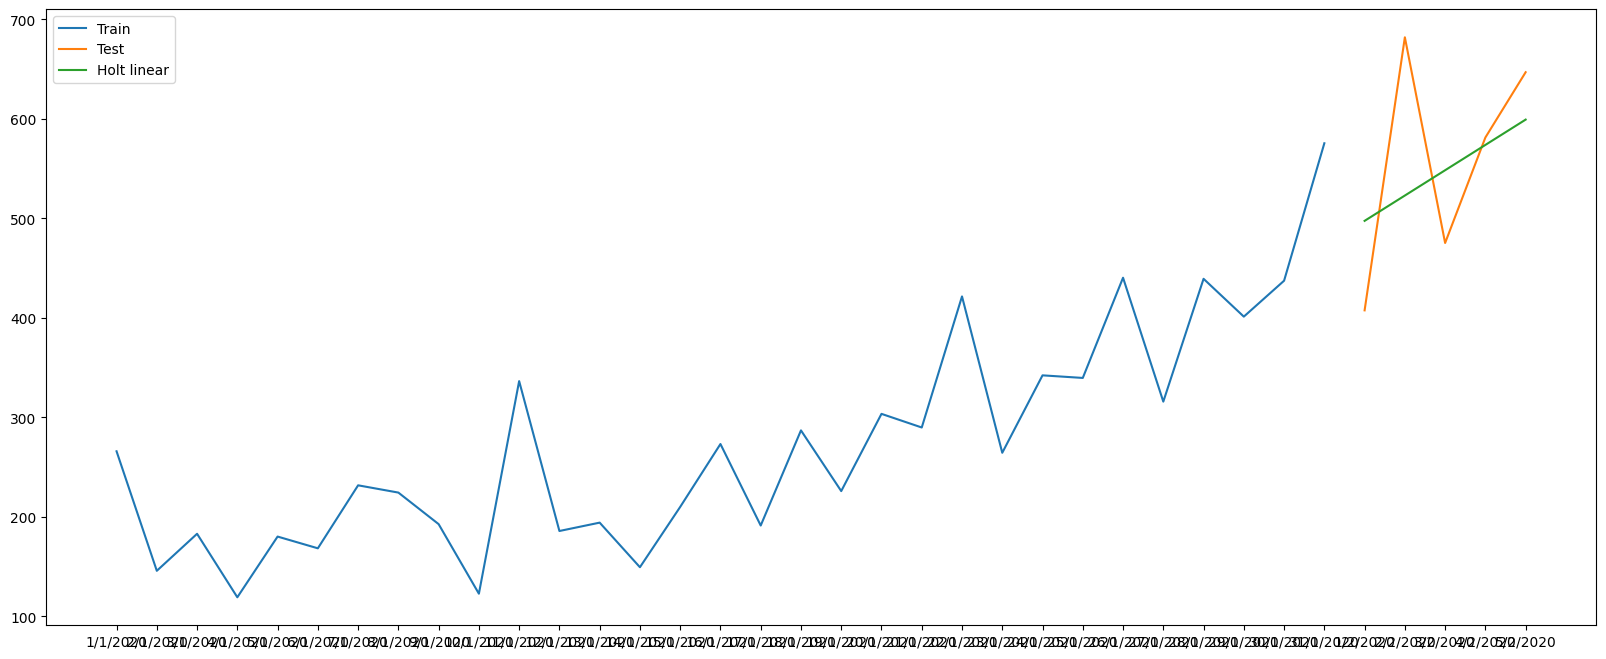

In [13]:
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], y_predict, label = 'Holt linear')
plt.legend(loc = 'upper left')
plt.show()

In [14]:
rmse_holt = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=test['Sales'], squared = False)
print(rmse_holt)

90.60618474314447


### 1.3 Holt Linear dampled

这段代码与前面的Holt线性趋势模型非常相似，只不过在定义模型时增加了一个参数damped_trend=True，用于指定趋势项是否应该有阻尼效应。阻尼效应可以使得趋势的增长或减缓更加平滑，避免模型过度拟合训练数据。

In [15]:
holt_d = ETSModel(train['Sales'], trend='add', damped_trend = True)
holt_d_fit = holt_d.fit()
y_predict = holt_d_fit.forecast(5)

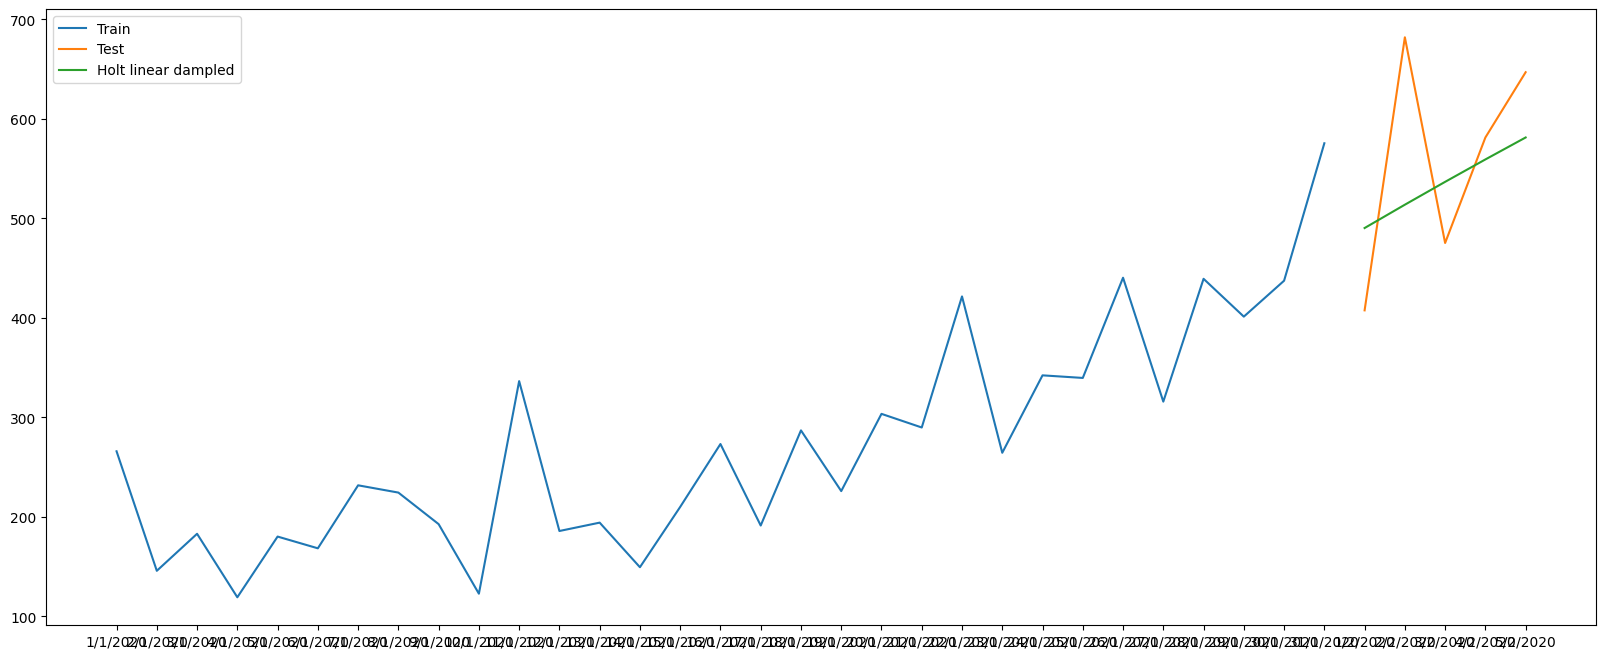

In [16]:
plt.figure(figsize = (20,8))
plt.plot(train['Date'], train['Sales'], label = 'Train')
plt.plot(test['Date'], test['Sales'], label = 'Test')
plt.plot(test['Date'], y_predict, label = 'Holt linear dampled')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
rmse_holt_damped = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=test['Sales'], squared = False)
print(rmse_holt_damped)

93.49727920827722


## 2. Cardiovascular deaths (CVD)

In [18]:
# import the data
cvd = pd.read_csv('CVD.csv')
print(cvd.head())

   year  quarter   cvd
0  1987        1  4761
1  1987        2  4217
2  1987        3  3950
3  1987        4  4639
4  1988        1  5354


首先使用matplotlib库创建一个大小为20x8英寸的画布，代码为plt.figure(figsize=(20,8))。

然后，使用plt.plot()函数将cvd数据集中的cvd列作为y轴数据进行绘图，x轴数据默认为该列数据的索引值。这里没有给定x轴数据，因此默认使用该列数据的索引作为x轴。plt.plot(cvd['cvd'])表示用连续的线条将cvd数据集中的cvd列的数值依次连接起来，从而呈现出cvd随时间的变化趋势。

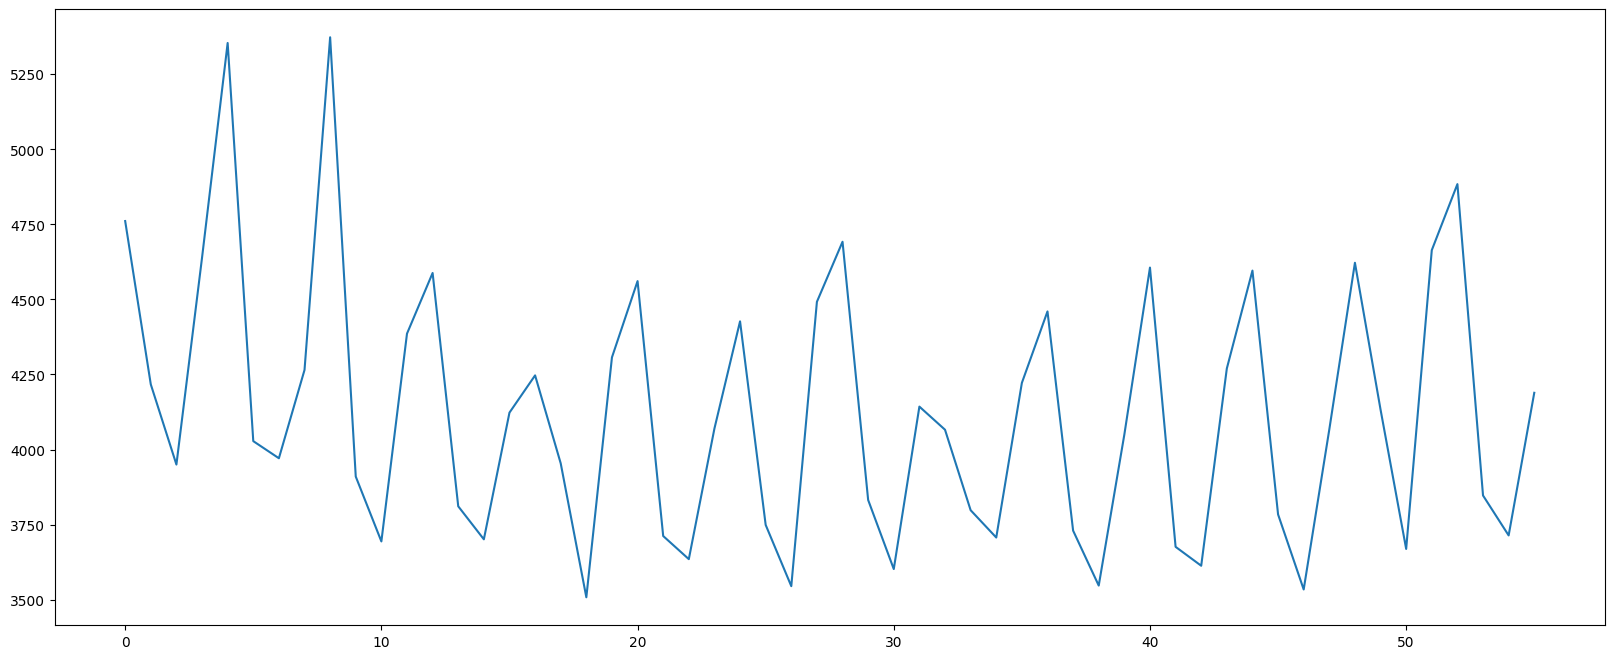

In [19]:
# plot the data
plt.figure(figsize = (20,8))
plt.plot(cvd['cvd'])

### Let us try different exponential smoothing methods

首先计算出cvd数据集中90%的行数，并将其转换为整数类型，然后赋值给变量N_train。这个值可以用于将数据集划分为训练集和测试集。一般我们会将大部分的数据用于训练模型，只留下一小部分数据进行模型的测试和评估。

接下来，代码计算出测试集的行数，即数据集总行数减去训练集的行数，将其赋值给变量N_test。

In [20]:
# let's first split our data into 90% training and 10% testing
N_train = int(0.9*cvd.shape[0])
N_test = cvd.shape[0] - N_train
print(N_train)
print(N_test)

50
6


将cvd数据集划分为训练集和测试集。cvd_train包含前N_train行的数据，也就是数据集中的前90%数据。cvd_test包含数据集中从第N_train+1行开始的数据，也就是数据集中的后10%数据。这样，我们就可以用cvd_train训练时间序列模型，然后使用cvd_test对模型进行测试和评估。

[:N_train]表示选取从数据集开头开始到第N_train行（不包括第N_train行）的所有数据作为训练集。[N_train:]表示选取从第N_train行开始到末尾的所有数据作为测试集。这是Python中切片（slice）操作的一种常见用法。在使用切片时，左侧的下标表示要选取的子序列的起始位置，右侧的下标表示子序列的结束位置（不包括该位置的元素）

如果左侧下标省略，则表示从序列的开头开始选取；如果右侧下标省略，则表示选取到序列的末尾为止。

In [21]:
cvd_train = cvd[:N_train] # take first N_train (50) data as trainig data
cvd_test = cvd[N_train:] # the remaining N_test (6) data as test data

Text(0.5, 1.0, 'Quarterly cardiovascular deaths, 1987 - 2000')

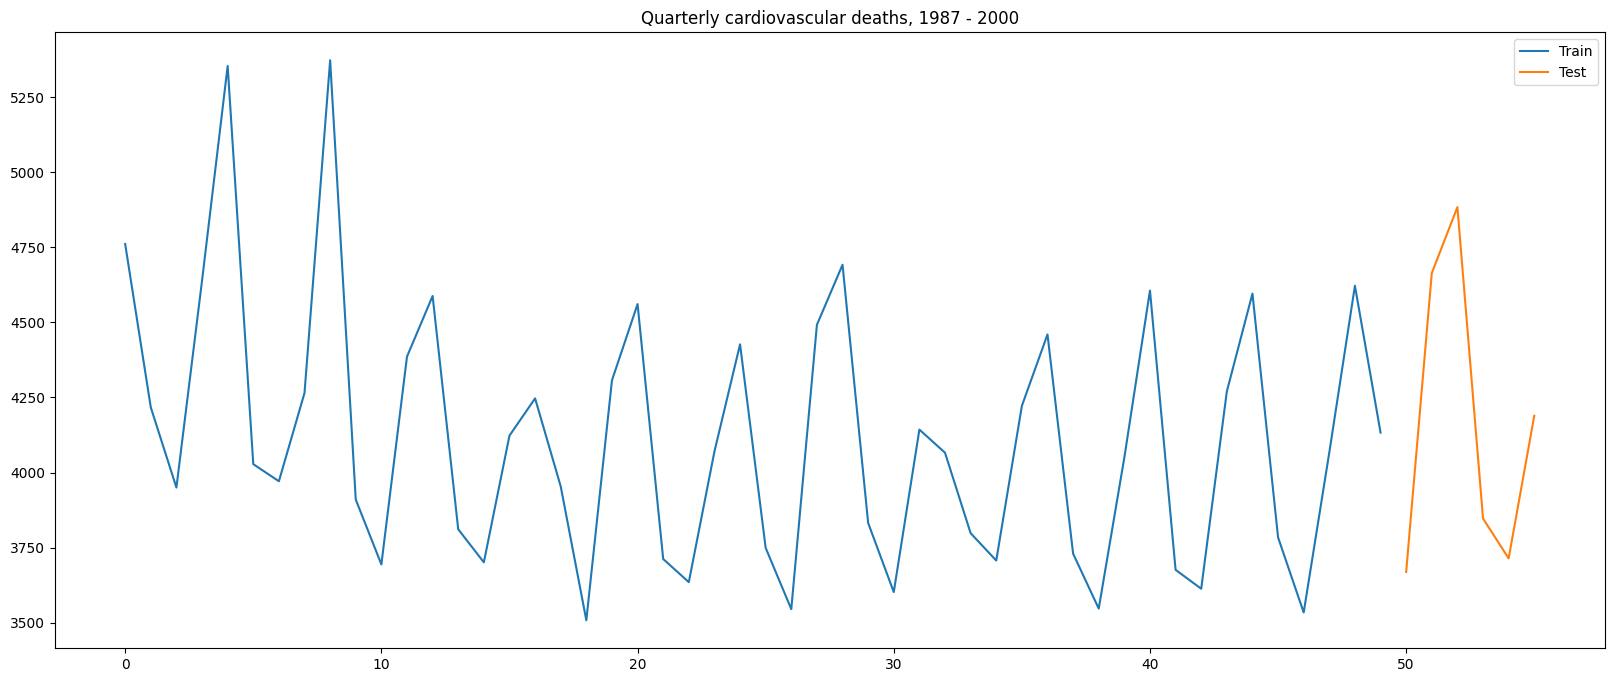

In [22]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.legend(loc = 'upper right')
plt.title('Quarterly cardiovascular deaths, 1987 - 2000')

### 2.1 Simple exponential smoothing

使用简单指数平滑模型（SES）对训练集进行拟合，并生成与测试集等长的预测序列。

第一行将训练集中的cvd列数据转换为浮点数类型，并将其作为参数创建一个简单指数平滑模型（SES）对象。第二行使用fit()方法对SES模型进行拟合，得到一个拟合对象ses_fit。第三行使用forecast()方法对拟合对象进行预测，生成与测试集等长的预测序列y_predict，其中N_test是测试集中数据点的个数，即预测序列的长度。

In [23]:
ses = ETSModel(cvd_train['cvd'].astype('float64')) # convert integer into float
ses_fit = ses.fit()
y_predict = ses_fit.forecast(N_test)

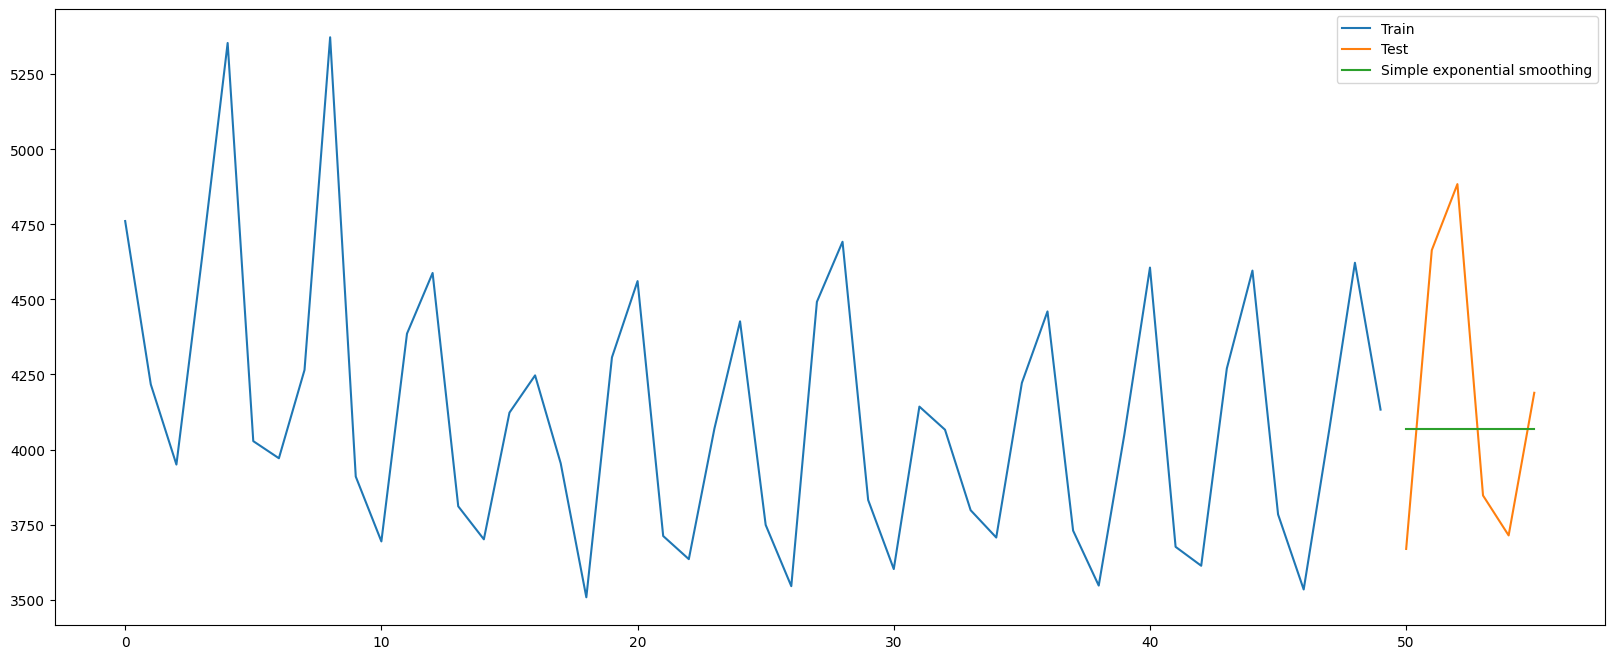

In [24]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Simple exponential smoothing')
plt.legend(loc = 'upper right')
plt.show()

In [25]:
rmse_ses = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_ses)

477.6302897740539


### 2.2 Holt linear

[Exercise] \
    1. Please try Holt Linear model with no damping. \
    2. Plot the figure that shows training data, test data, and predicted data. \
    3. Get the RMSE on the test data. \
[Hint] Specify the column `cvd` as "float64" type.

In [26]:
holt = ETSModel(cvd_train['cvd'].astype('float64'), trend='add')
holt_fit = holt.fit()
y_predict = holt_fit.forecast(N_test)

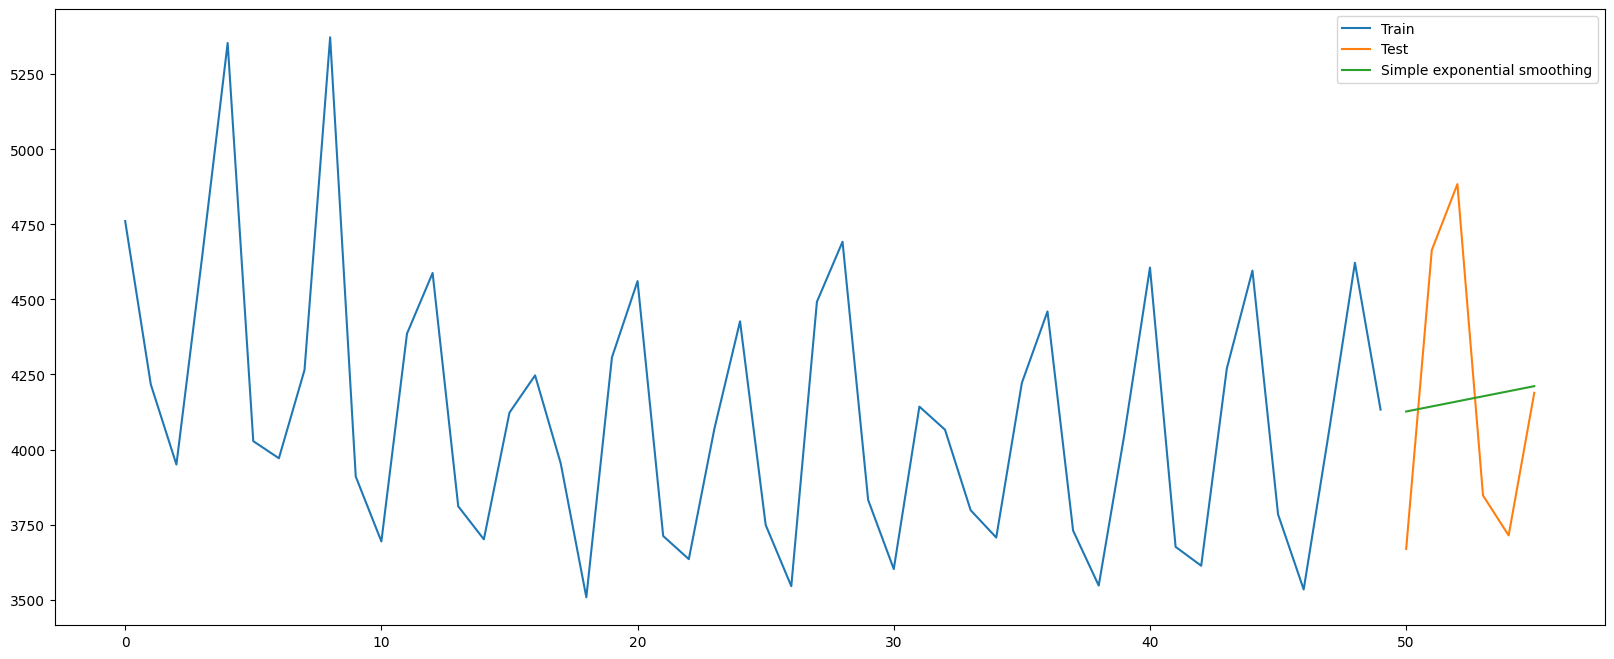

In [27]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Simple exponential smoothing')
plt.legend(loc = 'upper right')
plt.show()

In [28]:
rmse_holt = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_holt)

473.2968392544951


### 2.3 Holt Winter

In [29]:
hw = ETSModel(cvd_train['cvd'].astype('float64'), trend='add', seasonal = 'add', seasonal_periods = 4)
hw_fit = hw.fit()
y_predict = hw_fit.forecast(N_test)

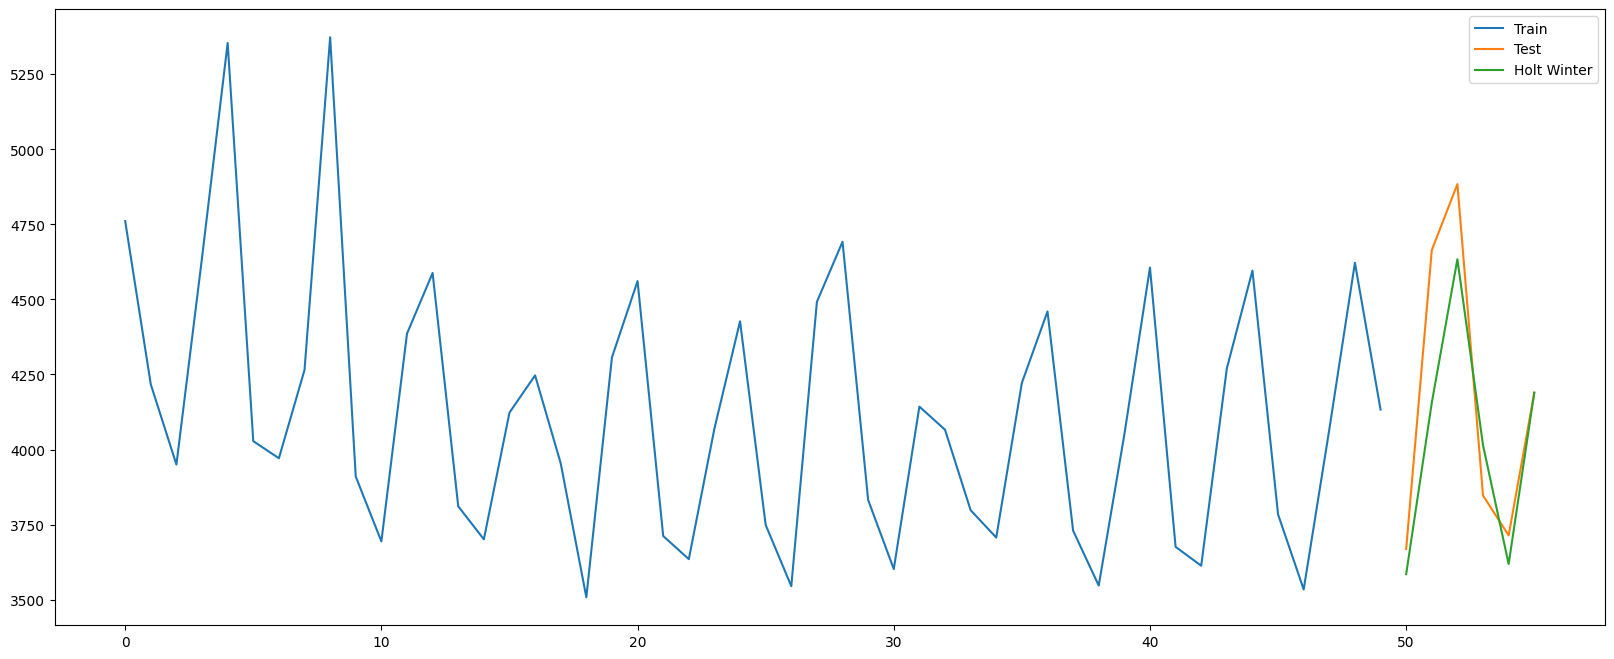

In [30]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Holt Winter')
plt.legend(loc = 'upper right')
plt.show()

In [31]:
rmse_hw = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_hw)

246.58410963354345


### 2.4 Holt Winter damped

In [32]:
hw_d = ETSModel(cvd_train['cvd'].astype('float64'), trend='add', damped_trend = True, seasonal = 'add', seasonal_periods = 4)
hw_d_fit = hw_d.fit()
y_predict = hw_d_fit.forecast(N_test)

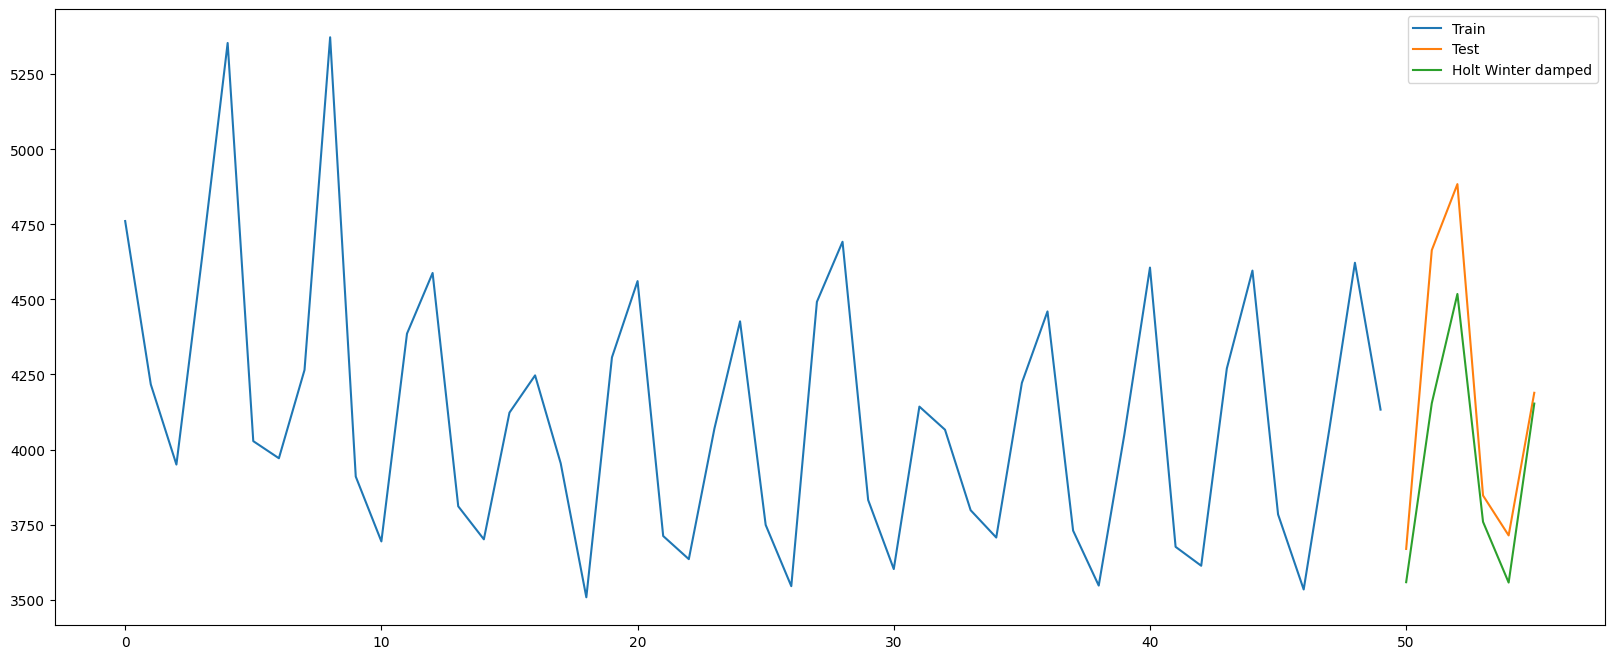

In [33]:
plt.figure(figsize = (20,8))
plt.plot(cvd_train['cvd'], label = 'Train')
plt.plot(cvd_test['cvd'], label = 'Test')
plt.plot(y_predict, label = 'Holt Winter damped')
plt.legend(loc = 'upper right')
plt.show()

In [34]:
rmse_hw_d = metrics.mean_squared_error(y_pred=y_predict,
                                       y_true=cvd_test['cvd'], squared = False)
print(rmse_hw_d)

270.68287918912074
